# Plotting Overfitting

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
heart = pd.read_csv('../../data/heart.csv')
heart.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,max_hr,exang,old_peak,slope,ca,thal,disease
0,63,Male,typical,145,233,1,left ventricular hypertrophy,150,0,2.3,3,0.0,fixed,0
1,67,Male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,2,3.0,normal,1
2,67,Male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,2,2.0,reversable,1
3,37,Male,nonanginal,130,250,0,normal,187,0,3.5,3,0.0,normal,0
4,41,Female,nontypical,130,204,0,left ventricular hypertrophy,172,0,1.4,1,0.0,normal,0


## Add a random number to make all the values in X unique
Adding a small random number to each value of `max_hr` will make it unique and subsequently guarantee us a perfect fit on the training data.

In [7]:
# The data is sorted so that the line plot below is ordered.
heart_sort = heart.sort_values('max_hr')
X = heart_sort['max_hr'].values + np.random.rand(len(heart_sort))
X = X.reshape(-1, 1)
y = heart_sort['disease'].values

In [8]:
# import and instantiate
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [9]:
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dtc.score(X, y)

1.0

## Why does this lead to a perfect fit?

# Plot the original data along with the prediction

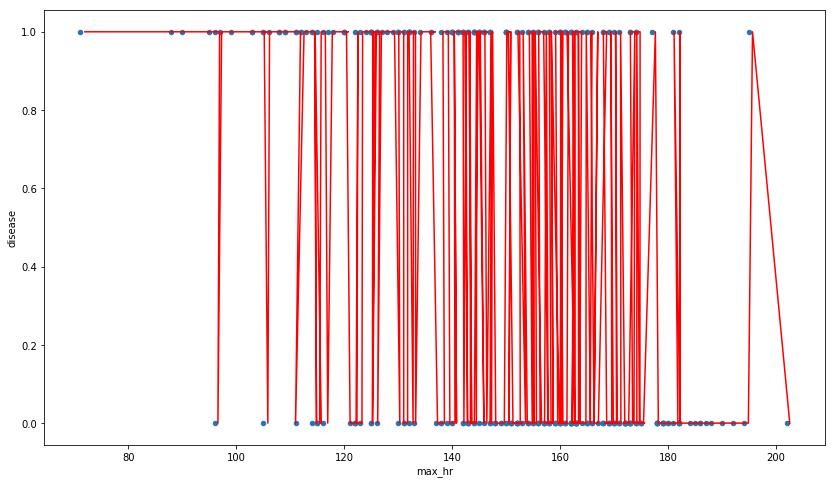

In [11]:
y_pred = dtc.predict(X)
ax = heart.plot(kind='scatter', x='max_hr', y='disease', figsize=(14, 8))
ax.plot(X, y_pred, color='red')

# Extreme Overfitting
We can clearly see that the model is memorizing the data. By default, the decision tree **`max_depth`** hyperparameter is set to **`None`**. The documentation informs us that it continues to make new splits until all nodes are "pure". **Pure** meaning that all values are the same in each node. i.e. all the people have the same value for disease.

## Verify overfitting with cross validation

In [12]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle=True)
cross_val_score(dtc, X, y, cv=kf)

array([0.57377049, 0.59016393, 0.54098361, 0.6       , 0.51666667])